# scikit-learn is a powerful machine learning library in Python that provides simple and efficient tools for data analysis and modeling.

# 1 Importing modules

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading datasets

The Iris dataset is a built-in dataset in scikit-learn.

In [ ]:
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

# 3. Train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
x_train.shape


(120, 4)

In [ ]:
y_train.shape

(120,)

# 4. Train Logistic Regression : Logistic Regression is a classification algorithm 

In [ ]:
model = LogisticRegression(max_iter= 200)



In [ ]:
# Train the model
model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


# 5. Make prediction

Use trained models to predict labels for test data.


In [ ]:
y_pred = model.predict(x_test)

# 6. MOdel accuracy
Evaluate the model using accuracy.

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy Percentage: {accuracy * 100:.2f}%")


Accuracy Percentage: 100.00%


# 7. Confusion matrix
Displays correct and incorrect predictions.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 8. Classification report
Provides precision, recall, F1-score, and support.

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 9. Standardize features (StandardScalar)
Feature scaling ensures all features have equal importance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 10. Label encoding
Converts categorical labels to numerical values.


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 11. Train a Decision Tree Classifier
Decision tree splits the data based on feature condition

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 12. Train a Random Forest Classifier

Random Forest is an ensemble of multiple decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 13. Cross-Validation Score

Cross-validation checks model stability.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv = 5)
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [ ]:

print("Mean Accuracy:", scores.mean())


Mean Accuracy: 0.9733333333333334


# 14. Pipeline with Preprocessing + Model

Pipeline combines preprocessing and model training.

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())])

pipe.fit(x_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


# 15. Plot Learning Curve

Learning curves show model performance vs training size. That is, computes training & validation scores for different dataset sizes
- Linspace comes from numpy: It generates evenly spaced numbers between a start value and an end value [ np.linspace(start, stop, num) ]

/home/amma/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/amma/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/amma/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 85

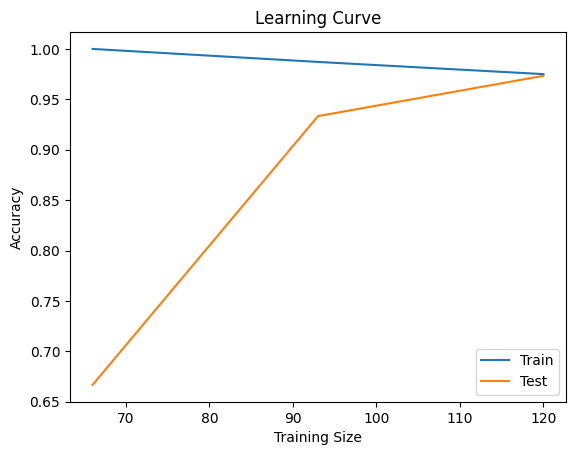

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np



#This function trains your model multiple times using different amounts of training data.
train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, train_sizes = np.linspace(0.1,1.0,5))


plt.plot(train_sizes, train_scores.mean(axis=1), label = "Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.show()

Conclusion: The learning curve shows that as training size increases, the model generalizes better and achieves stable, high accuracy without overfitting.